# Demo and tests on multiple DNA sequences alignment

In [1]:
from utils import cost, addgap, print_table, deletion, substitution, insertion
from alignment import align_nw_2by2, align_star_multiple
from numpy.random import choice, randint
import numpy as np

In [2]:
np.random.seed(42) # fixing random state

In [3]:
alphabet = ["A", "C", "G", "T"] # nucleotides to consider for DNA sequences

## Test "cost" function

This function returns the score 2 is the two letters are alike and -1 otherwise.

In [4]:
for i in range(5):
    l1 = choice(alphabet)
    l2 = choice(alphabet)
    print("The cost of ({}, {}) equals {}.".format(l1, l2, cost(l1, l2)))

The cost of (G, T) equals -1.
The cost of (A, G) equals -1.
The cost of (G, T) equals -1.
The cost of (A, A) equals 2.
The cost of (G, C) equals -1.


## Test "addgap" function

This function **successively** adds gaps in the sequence at positions indicated in the *gaplist* argument.

In [5]:
seq = ''.join(choice(alphabet, 7))
gaplist = randint(7+5, size=5)
print("The initial sequence equals: {} and the gaplist equals: {}.".format(seq, gaplist))
newseq = addgap(seq, gaplist, verbose=1)
print("The final sequence equals:   {}.".format(newseq))

The initial sequence equals: GGGGTAT and the gaplist equals: [7 7 2 5 4].
gap introduced in 7th position -> new sequence equals GGGGTAT_.
gap introduced in 7th position -> new sequence equals GGGGTAT__.
gap introduced in 2th position -> new sequence equals GG_GGTAT__.
gap introduced in 5th position -> new sequence equals GG_GG_TAT__.
gap introduced in 4th position -> new sequence equals GG_G_G_TAT__.
The final sequence equals:   GG_G_G_TAT__.


## Test "align_nw_2by2" function

This function aligns 2 sequences with the Needleman & Wunsch method and returns:

* the score matrix
* the path matrix
* the aligned sequences
* the list of introduced gaps

The initial sequences are:
ATGAGAT AGGAGAGT
The aligned sequences are:
['ATGAGA_T', 'AGGAGAGT']
The positions of the introduced gaps are:
[]
The score matrix equals:


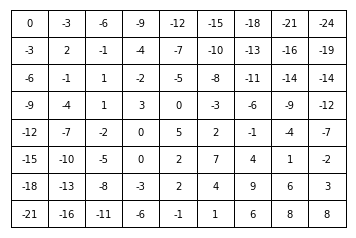

None
The path matrix equals:


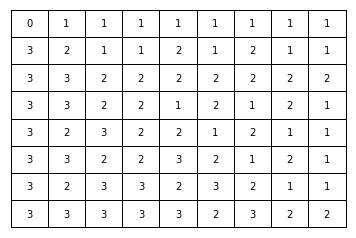

None


In [6]:
s1 = "ATGAGAT"
s2 = "AGGAGAGT"
res2by2 = align_nw_2by2(s1, s2)
print("The initial sequences are:")
print(s1, s2)
print("The aligned sequences are:")
print(res2by2[2])
print("The positions of the introduced gaps are:")
print(res2by2[3])
print("The score matrix equals:")
print(print_table(res2by2[0]))
print("The path matrix equals:")
print(print_table(res2by2[1]))

## Test "align_star_multiple" function

### EXAMPLE 1: COURSE SLIDES PAGE 16

This example should return:
- A TGAGA_T
- A GGAGAGT
- _ GGAG_G_
- A GG_GAGT
- A _GA_A_C

In [7]:
align_star_multiple(["ATGAGAT", "AGGAGAGT", "GGAGG", "AGGGAGT", "AGAAC"])

pairs = [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
scores2a2 = [8.0, -2.0, 3.0, 1.0, 1.0, 11.0, -2.0, 1.0, 1.0, -2.0]
global scores = [10.0, 18.0, 1.0, 13.0, -2.0]
pivot sequence =  AGGAGAGT
initial seqs =
ATGAGAT
AGGAGAGT
GGAGG
AGGGAGT
AGAAC
res aligned to pivot =
ATGAGA_T
AGGAGAGT
_GGAG_G_
AGG_GAGT
A_GA_A_C


['ATGAGA_T', 'AGGAGAGT', '_GGAG_G_', 'AGG_GAGT', 'A_GA_A_C']

### EXAMPLE 2: TEST ON SYNTHETIZED DATA - Simple modifications (substitutions, deletions, insertions)

Test with one mutation per sequence either at the beginning, at the end or in the middle.

In [8]:
n = 10 # length of the initial sequence
seq0 = choice(alphabet, n)
seq0 = ''.join(seq0)

# seq 1 = substitution middle
seq1 = substitution(seq0, int(n/2))
# seq 2 = deletion middle
seq2 = deletion(seq0, int(n/2)-1)
# seq 3 = insertion middle
seq3 = insertion(seq0, int(n/2))

# seq 4 = substitution begining
seq4 = substitution(seq0, 0)
# seq 5 = deletion begining
seq5 = deletion(seq0, 0)
# seq 6 = insertion begining
seq6 = insertion(seq0, 0)

# seq 7 = substitution end
seq7 = substitution(seq0, -1)
# seq 8 = deletion end
seq8 = deletion(seq0, -1)
# seq 9 = insertion end
seq9 = insertion(seq0, -1)

# global alignement
align_star_multiple([seq0, seq1, seq2, seq3, seq4, seq5, seq6, seq7, seq8, seq9])

pairs = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]
scores2a2 = [17.0, 15.0, 17.0, 17.0, 15.0, 17.0, 17.0, 15.0, 17.0, 15.0, 14.0, 14.0, 12.0, 14.0, 14.0, 12.0, 14.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 14.0, 12.0, 14.0, 14.0, 12.0, 16.0, 15.0, 14.0, 14.0, 12.0, 14.0, 12.0, 12.0, 10.0, 12.0, 14.0, 12.0, 14.0, 15.0, 14.0, 12.0]
global scores = [147.0, 126.0, 114.0, 125.0, 126.0, 112.0, 123.0, 126.0, 112.0, 125.0]
pivot sequence =  CTTCCCTTAA
initial seqs =
CTTCCCTTAA
CTTCCGTTAA
CTTCCTTAA
CTTCCCCTTAA
ATTCCCTTAA
TTCCCTTAA
TCTTCCCTTAA
CTTCCCTTAC
CTTCCCTTA
CTTCCCTTAAA
res aligned to pivot =
_CTT_CCCTT_AA
_CTT_CCGTT_AA
_CTT__CCTT_AA
_CTTCCCCTT_AA
_ATT_CCCTT_AA
__TT_CCCTT_AA


['_CTT_CCCTT_AA',
 '_CTT_CCGTT_AA',
 '_CTT__CCTT_AA',
 '_CTTCCCCTT_AA',
 '_ATT_CCCTT_AA',
 '__TT_CCCTT_AA',
 'TCTT_CCCTT_AA',
 '_CTT_CCCTT_AC',
 '_CTT_CCCTT__A',
 '_CTT_CCCTTAAA']

### EXAMPLE 3: TEST ON SYNTHETIZED DATA - Two succesive simple modifications (substitutions, deletions, insertions)

Test with two successive mutations per sequence of the same kind (substitution, deletion or insertion) either at the beginning, at the end or in the middle.

In [9]:
n = 10 # length of the initial sequence
seq0 = choice(alphabet, n)
seq0 = ''.join(seq0)

# seq 1 = substitution middle
seq1 = substitution(seq0, int(n/2))
seq1 = substitution(seq1, int(n/2)+1)
# seq 2 = deletion middle
seq2 = deletion(seq0, int(n/2)-1)
seq2 = deletion(seq2, int(n/2)-1)
# seq 3 = insertion middle
seq3 = insertion(seq0, int(n/2))
seq3 = insertion(seq3, int(n/2))


# seq 4 = substitution begining
seq4 = substitution(seq0, 0)
seq4 = substitution(seq4, 1)
# seq 5 = deletion begining
seq5 = deletion(seq0, 0)
seq5 = deletion(seq5, 0)
# seq 6 = insertion begining
seq6 = insertion(seq0, 0)
seq6 = insertion(seq6, 0)

# seq 7 = substitution end
seq7 = substitution(seq0, -1)
seq7 = substitution(seq7, -2)
# seq 8 = deletion end
seq8 = deletion(seq0, -1)
seq8 = deletion(seq8, -1)
# seq 9 = insertion end
seq9 = insertion(seq0, -1)
seq9 = insertion(seq9, -1)

# global alignement
align_star_multiple([seq0, seq1, seq2, seq3, seq4, seq5, seq6, seq7, seq8, seq9])

pairs = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]
scores2a2 = [14.0, 10.0, 14.0, 14.0, 10.0, 14.0, 14.0, 10.0, 14.0, 10.0, 11.0, 8.0, 4.0, 8.0, 8.0, 4.0, 8.0, 4.0, 4.0, 7.0, 4.0, 4.0, 10.0, 4.0, 8.0, 4.0, 10.0, 8.0, 4.0, 9.0, 10.0, 8.0, 8.0, 4.0, 8.0, 4.0, 4.0, 1.0, 4.0, 8.0, 4.0, 8.0, 10.0, 8.0, 4.0]
global scores = [114.0, 75.0, 57.0, 72.0, 72.0, 48.0, 68.0, 72.0, 51.0, 67.0]
pivot sequence =  GGGCTTTTGC
initial seqs =
GGGCTTTTGC
GGGCTCGTGC
GGGCTTGC
GGGCTGCTTTGC
TAGCTTTTGC
GCTTTTGC
AGGGGCTTTTGC
GGGCTTTTTT
GGGCTTTT
GGGCTTTTGAAC
res aligned to pivot =
GGGCT__TTTGC
GGGCT__CGTGC
GGGC____TTGC
GGGCTGCTTTGC
TAGCT__TTTGC
__GCT__TTTGC
AGGGGCTTTTGC
GGGCT__TTTTT
GGGCT__TTT__
GGGCTT

['GGGCT__TTTGC',
 'GGGCT__CGTGC',
 'GGGC____TTGC',
 'GGGCTGCTTTGC',
 'TAGCT__TTTGC',
 '__GCT__TTTGC',
 'AGGGGCTTTTGC',
 'GGGCT__TTTTT',
 'GGGCT__TTT__',
 'GGGCTTTTGAAC']

### EXAMPLE 3: TEST ON SYNTHETIZED DATA - Two succesive simple modifications (substitutions, deletions, insertions)

Test with two successive mutations per sequence of the same kind (substitution, deletion or insertion) either at the beginning, at the end or in the middle.

In [10]:
n = 10 # length of the initial sequence
seq0 = choice(alphabet, n)
seq0 = ''.join(seq0)

# seq 1
seq1 = substitution(seq0, int(n/2))
seq1 = deletion(seq1, 0)
# seq 2
seq2 = deletion(seq0, int(n/2)-1)
seq2 = insertion(seq2, 1)
# seq 3
seq3 = insertion(seq0, int(n/2)+1)
seq3 = substitution(seq3, -1)

# seq 4
seq4 = substitution(seq0, 0)
seq4 = deletion(seq4, -1)
# seq 5
seq5 = deletion(seq0, 0)
seq5 = insertion(seq5, int(n/2)-1)
# seq 6
seq6 = insertion(seq0, 0)
seq6 = substitution(seq6, 7)

# seq 7
seq7 = substitution(seq0, -1)
seq7 = deletion(seq7, 1)
# seq 8
seq8 = deletion(seq0, -1)
seq8 = insertion(seq8, int(n/2))
# seq 9
seq9 = insertion(seq0, -1)
seq9 = substitution(seq9, 1)

# global alignement
align_star_multiple([seq0, seq1, seq2, seq3, seq4, seq5, seq6, seq7, seq8, seq9])

pairs = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]
scores2a2 = [12.0, 12.0, 14.0, 12.0, 12.0, 14.0, 12.0, 14.0, 14.0, 6.0, 6.0, 7.0, 12.0, 6.0, 9.0, 6.0, 6.0, 6.0, 4.0, 8.0, 8.0, 6.0, 6.0, 6.0, 9.0, 8.0, 11.0, 12.0, 14.0, 10.0, 7.0, 6.0, 7.0, 12.0, 6.0, 6.0, 9.0, 9.0, 8.0, 6.0, 8.0, 8.0, 9.0, 9.0, 11.0]
global scores = [116.0, 70.0, 62.0, 90.0, 70.0, 79.0, 73.0, 79.0, 89.0, 78.0]
pivot sequence =  GCTATCCCAC
initial seqs =
GCTATCCCAC
CTATACCAC
GCCTACCCAC
GCTATCTCCAT
TCTATCCCA
CTATTCCCAC
AGCTATCTCAC
GTATCCCAT
GCTATCCCCA
GGTATCCCAAC
res aligned to pivot =
G_CTATC_CCAC
__CTATA_CCAC
GCCTA_C_CCAC
G_CTATCTCCAT
_TCTATC_CCA_
__CTATTCCCAC
AGCTATC_TCAC
G__TATC_CCAT
G_CTATCCCCA_
G_GTA

['G_CTATC_CCAC',
 '__CTATA_CCAC',
 'GCCTA_C_CCAC',
 'G_CTATCTCCAT',
 '_TCTATC_CCA_',
 '__CTATTCCCAC',
 'AGCTATC_TCAC',
 'G__TATC_CCAT',
 'G_CTATCCCCA_',
 'G_GTATCCCAAC']